# 課題
## 実行環境
Google Colaboratory を推奨．
## 要件
- k-Means法の過程を観察する関数 `kmeans0` を改変してFCM法の過程を観察する関数 `fcm0` を作成し，FCM法の挙動を確認せよ．
 - `def fcm0(X, C, theta)` のように引数にファジィ度 `theta` を追加する．
 - `kmeans0` と同様にクラスタリング過程を散布図で図示し，クラスター形成過程を観察できるようにする．
 - 同時に，FCM法の目的関数値を計算し，観察できるようにする．
 - クラスター形成過程の観察が主な目的であるため，収束判定まで含めた完成版にする必要はない．
 - `theta` を $\{1.05, 2.0, 5.0, 10.0\}$ の各場合で実行し，クラスター形成過程や目的関数値を観察し，比較・考察せよ．

※注意：アルゴリズムのメインのイテレーションのfor文以外は，for文を使用せずに数式はNumPyを活用して実装すること．
***
## 提出について
- 下記の要件を満たす1つのWordファイルを提出する．
 - ファイル名「report7_XXXXX.docx」．ここで，XXXXXは各自の学籍番号．
 - 講義名，講義回，学籍番号，氏名，提出日を明示する．
 - 取り組んだ内容，ソースコード，コードの自作部分の解説，実行結果(グラフ)，結果の考察を記述する．
- 授業支援システムより提出．提出期限は授業支援システムを参照．

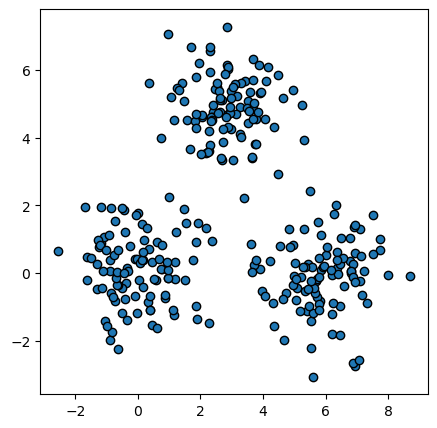

In [1]:
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt

np.random.seed(seed=0)
X = np.vstack((np.random.randn(100, 2)+(0, 0), 
               np.random.randn(100, 2)+(3, 5), 
               np.random.randn(100, 2)+(6, 0)))
n, m = X.shape

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], edgecolors='k')
plt.show()

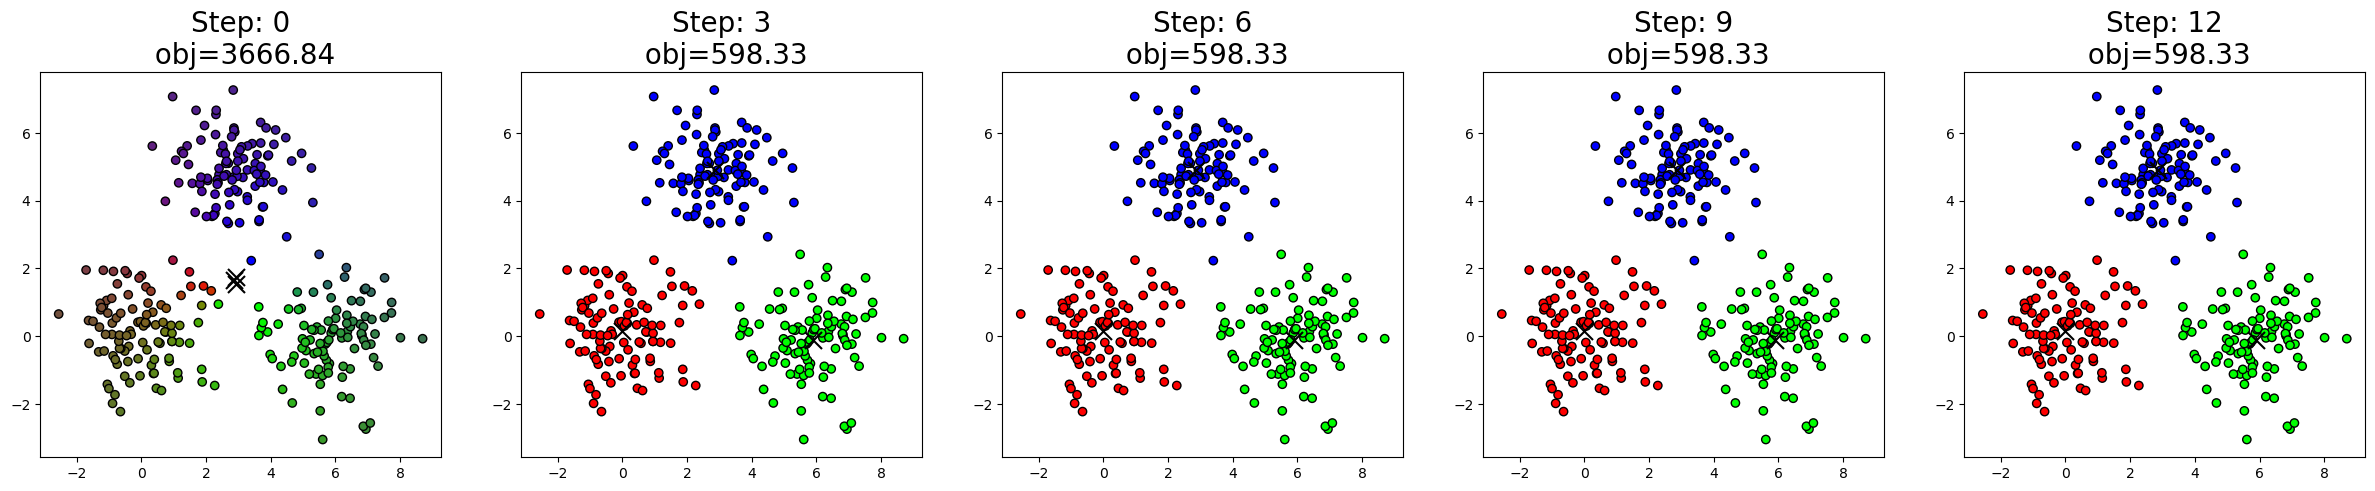

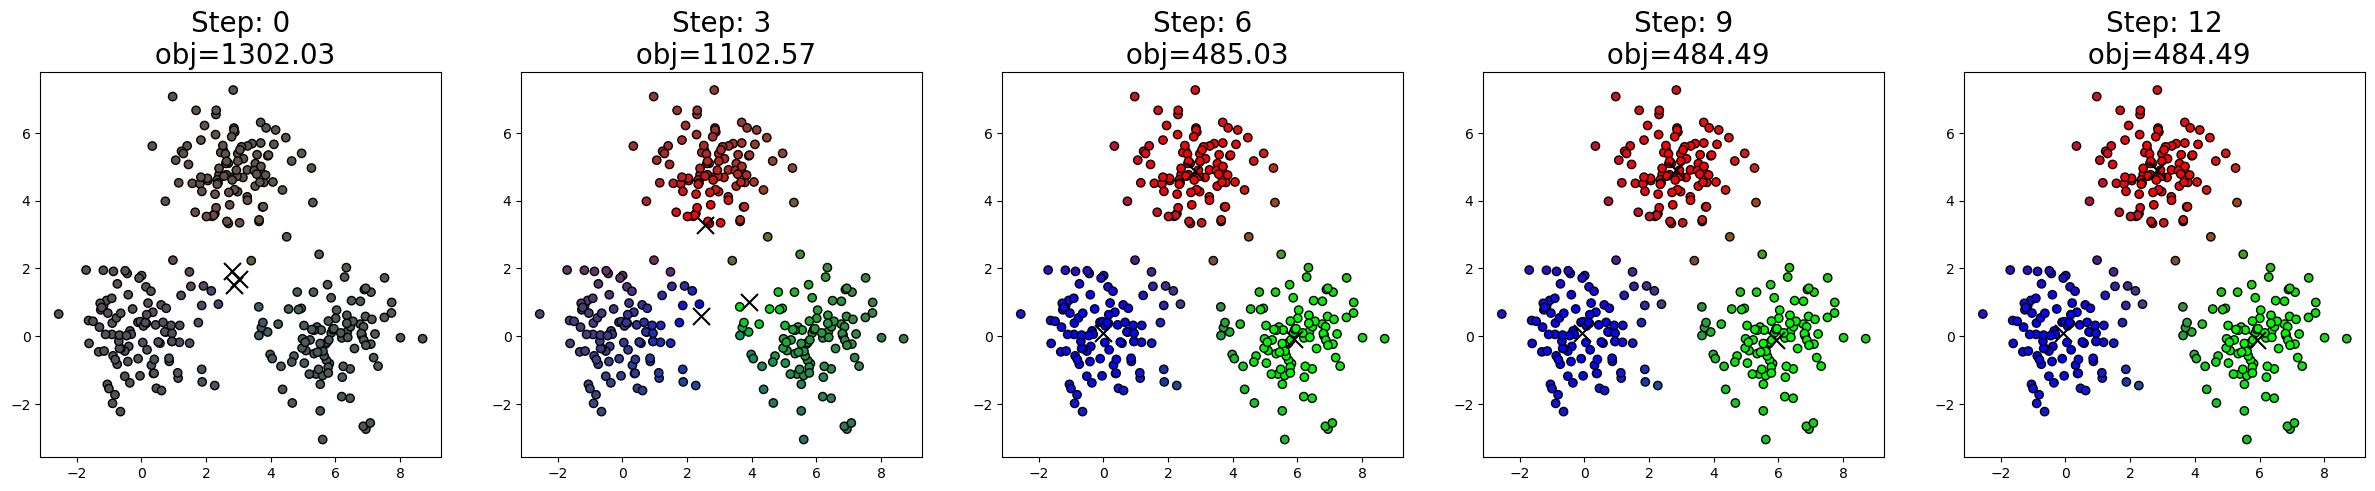

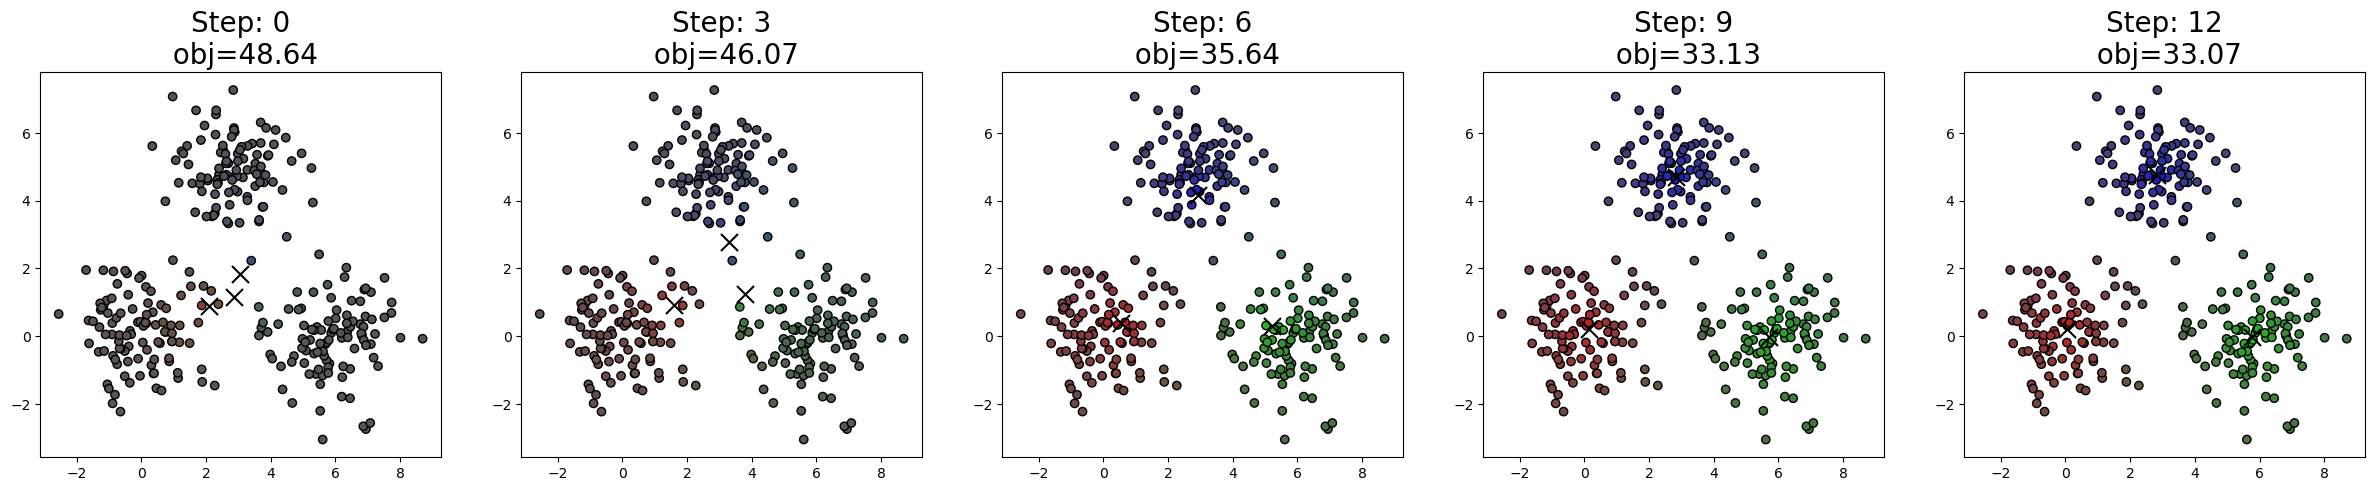

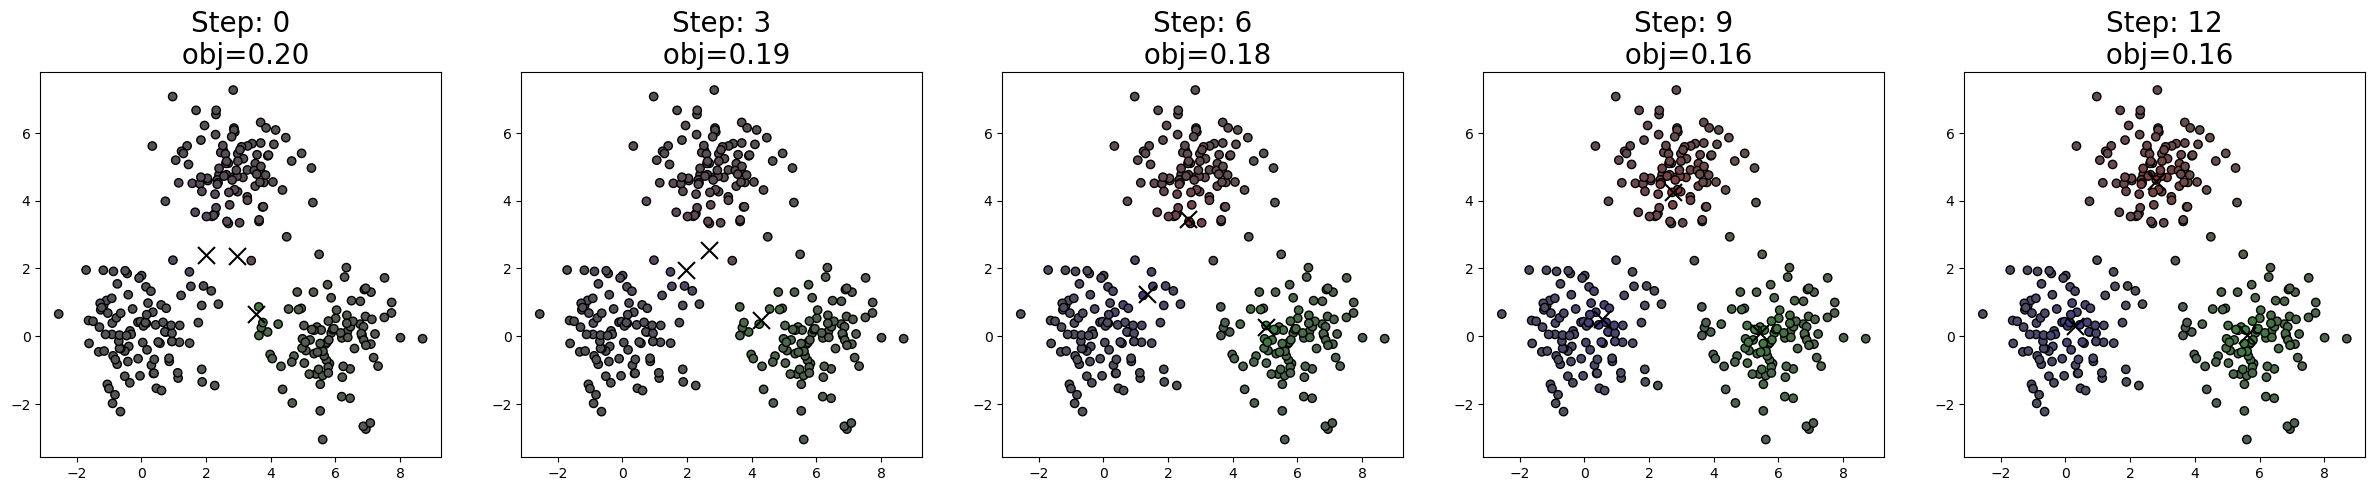

In [2]:
def fcm0(X, C, theta):
    plt.figure(figsize=(30, 5))
    n, m = X.shape
    u = np.random.rand(C, n)
    u /= u.sum(axis=0)
    for step in range(13):
        b = u ** theta @ X / (u ** theta).sum(1)[:, np.newaxis]
        d = dist.cdist(b, X)
        u = d ** (-2/(theta-1.0))
        u /= u.sum(axis=0)
    

        obj = (u ** theta * d**2).sum()
        
        if step % 3 == 0:
            plt.subplot(1, 5, step//3+1)
            plt.scatter(X[:, 0], X[:, 1], c=u.T, edgecolors='k')
            plt.scatter(b[:, 0], b[:, 1], marker='x', c='k', s=150)
            plt.title(f'Step: {step}\n obj={obj:.2f}', fontsize=20)
    plt.show()

C = 3
for theta in [1.05, 2.0, 5.0, 10.0]:
    fcm0(X, C, theta)

## 説明
***
fcm法はIn[2]で実装している．
2-5,8, 16-19行目についてはオリジナルの部分ではないため説明を省略する． 
6行目のfor文では，thetaの値が大きい時の挙動を確認するためにイテレーション回数を増やしている．  
7行目では，次の式に従いクラスター中心の算出を行なっている．  
\begin{eqnarray}
\textbf{b}_c = \frac{\sum_{i=1}^{n}u_{ci}^{\theta}\textbf{x}_{i}}{\sum_{i=1}^{n}u_{ci}^{\theta}}.
\end{eqnarray}

9-10行目では次の式に従い，メンバシップ値の算出をしている．
\begin{eqnarray}
u_{ci} &=&  \frac{d_{ci}^{\frac{-2}{\theta-1}}}{\sum_{l=1}^{C}d_{li}^{\frac{-2}
{\theta-1}}}. 
\end{eqnarray}
13行目では，次の式に従って目的関数の値を計算している．
\begin{eqnarray}
J_\textrm{FCM} = \sum_{c=1}^{C}\sum_{i=1}^{n}u_{ci}^{\theta}d_{ci}^{2}, \\
\textrm{s.t.}\quad \,  u_{ci} \in [0, 1], \forall c, \forall i, \\
\sum_{c=1}^{C}u_{ci}=1, \forall i. 
\end{eqnarray}
15行目では，描画を行う際に全てを表示するとグラフが長くなってしまうのでiイテレーションが3で割り切れる数である場合のみ描画を行うようにしている．